# Pure QCD flow

**Goal:** Let's train w/ negative $t\bar{t}$ weights to see if (in particular) the `X_wt_tag` distribution gets _more regular_ and therefore easier to model!

In [1]:
import numpy as np
import pandas as pd
import json

import matplotlib.pyplot as plt

**Step 1:** Compare the training loss curves

In [2]:
def test(x=1,y=2,z=3):
    print(x,y,z)

In [3]:
args = (2,-0.1)

In [4]:
test(*args,2)

2 -0.1 2


**Step 2:** Compare the GP fits


**Note:** We sort of have an open question rn of whether the 3b1f isn't doing as great b/c of issues w/ the flow or the underlying GP. But since Bill showed earlier (w/ the BDT paiering massplane) the GP fit was _a lot_ easier when we subtract off $t\bar{t}$, this seems like a reasonable thing to try here as well!

In [5]:
yr=16

In [6]:
with open(f'../gp-for-flows/models/qcd161718-MAY21_3b1f_1of10_detaCut_ggf//nsf_rq-coupling_log_pT_h1_log_pT_h2_eta_h1_eta_h2_X_wt_tag_log_dphi_hh_lu_10_layers_H_32_1_blocks_K_4_B_3_lr_0.001_1e-06_p0.1_iter0//hists_gp_100k_{yr}.json') as f:
    hdict = json.load(f)

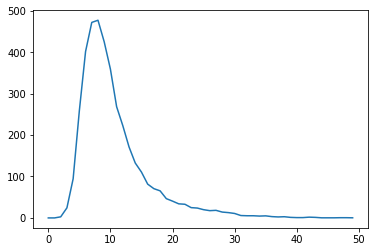

In [7]:
plt.plot(hdict['m_hh_SR_mean'])

In [8]:
yr_to_mc = {16: 'a', 17: 'd', 18: 'e'}

In [9]:
fname  = f'../data/RR/cryptotuples/data{yr}.root' 
ahname = f'../data/RR/cryptotuples/ttbar/quads/MC/410471_mc16{yr_to_mc[yr]}/NanoNTuple.root' 
slname = f'../data/RR/cryptotuples/ttbar/quads/MC/410470_mc16{yr_to_mc[yr]}/NanoNTuple.root'


x=124
y=117
eps=0.05
r_CR=45
ntag=3
minQ=1
nSplits=10 
replica=1 

In [10]:
import os

In [11]:
os.sys.path.append('../gp-for-flows/')
from flows import data

In [12]:
pargs = (x, y, eps, r_CR, ntag, minQ, nSplits, replica, 0, 0)
d = data( [fname], *pargs, is_mc=False)

ah = data([ahname], *pargs, is_mc=True)
sl = data([slname], *pargs, is_mc=True)

../data/RR/cryptotuples/data16.root
len(df) 32908
../data/RR/cryptotuples/ttbar/quads/MC/410471_mc16a/NanoNTuple.root
len(df) 18454
Scaling the lumi in ../data/RR/cryptotuples/ttbar/quads/MC/410471_mc16a/NanoNTuple.root by 24.6 ifb.
../data/RR/cryptotuples/ttbar/quads/MC/410470_mc16a/NanoNTuple.root
len(df) 18236
Scaling the lumi in ../data/RR/cryptotuples/ttbar/quads/MC/410470_mc16a/NanoNTuple.root by 24.6 ifb.


In [13]:
d.df.event_number

entry
0          25543131
1         182463841
2          86799611
3          90591071
4          35599031
            ...    
32903    2721802461
32904    2676255991
32905     912688841
32906    1253378421
32907    3587034131
Name: event_number, Length: 32908, dtype: int64

In [14]:
ah.df.event_number

entry  subentry
0      0               12901
1      0               15111
2      0               16711
3      0               19351
4      0              662411
                     ...    
18449  0           126538171
18450  0           126542471
18451  0           126544011
18452  0           126544331
18453  0           126547601
Name: event_number, Length: 18454, dtype: int64

In [15]:
sl.df.event_number

entry  subentry
0      0           343077701
1      0           343086621
2      0           343087081
3      0           343087861
4      0           343089861
                     ...    
18231  0           373916481
18232  0           373990701
18233  0           347827251
18234  0           389191231
18235  0           352555401
Name: event_number, Length: 18236, dtype: int64

**Conclusion:** It looks like the downsampling is happening appropriately.

In [16]:
xbins = np.linspace(0,7.5,51)
xx = 0.5 * (xbins[1:] + xbins[:-1])

Text(0.0, 1.0, '2016, pure QCD flow')

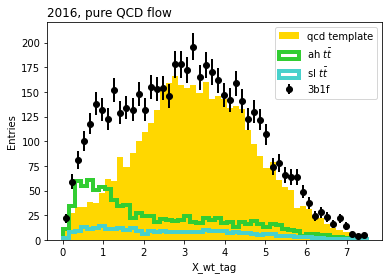

In [17]:
plt.hist(xx,xbins,weights=hdict['X_wt_tag_SR_mean'],color='gold',label='qcd template')



n3b1f = np.histogram(d.df.loc[d.df.X_hh < 1.6,'X_wt_tag'],xbins)[0]
plt.errorbar(xx,n3b1f,np.sqrt(n3b1f),lw=0,elinewidth=2,marker='o',color='k',label='3b1f')

for dfi,ci,li in zip([ah.df,sl.df],['limegreen','mediumturquoise'],[r'ah $t\bar{t}$',r'sl $t\bar{t}$']):

    mi = dfi.X_hh < 1.6
    ntt = np.histogram(dfi.loc[mi,'X_wt_tag'],xbins, weights=dfi.loc[mi,'mc_sf'])[0]
    plt.hist(xx,xbins,weights=ntt,color=ci,histtype='step',label=li,lw=4)
plt.legend()

plt.xlabel('X_wt_tag')
plt.ylabel('Entries')
plt.title('2016, pure QCD flow',loc='left')

For comparison, just look at the pure QCD template

Text(0.0, 1.0, '2016, pure QCD flow')

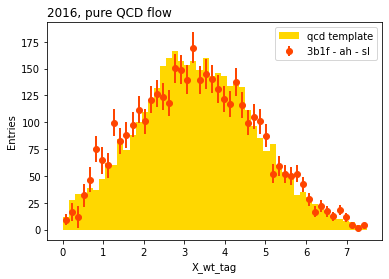

In [76]:
plt.hist(xx,xbins,weights=hdict['X_wt_tag_SR_mean'],color='gold',label='qcd template')


n3b1f = np.histogram(d.df.loc[d.df.X_hh < 1.6,'X_wt_tag'],xbins)[0]

tt_hists = {}

for dfi,ci,li in zip([ah.df,sl.df],['limegreen','mediumturquoise'],['ah','sl']):

    mi = dfi.X_hh < 1.6
    ntt = np.histogram(dfi.loc[mi,'X_wt_tag'],xbins, weights=dfi.loc[mi,'mc_sf'])[0]
    nntSqd = np.sqrt(np.histogram(dfi.loc[mi,'X_wt_tag'],xbins, 
                          weights=dfi.loc[mi,'mc_sf']**2)[0])

    tt_hists[li] = ntt
    tt_hists[li+'_err'] = nntSqd
    
q = n3b1f - tt_hists['ah'] - tt_hists['sl']
q2 = np.sqrt(n3b1f + tt_hists['ah_err']**2 + tt_hists['sl_err']**2)

plt.errorbar(xx,q,q2,lw=0,elinewidth=2,marker='o',color='orangered',
             label='3b1f - ah - sl')
    
plt.legend()

plt.xlabel('X_wt_tag')
plt.ylabel('Entries')
plt.title('2016, pure QCD flow',loc='left')

Text(0.0, 1.0, '2016, pure QCD flow')

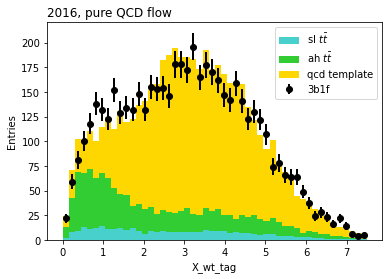

In [45]:
bot=0
for dfi,ci,li in zip([sl.df,ah.df],['mediumturquoise','limegreen'],[r'sl $t\bar{t}$',r'ah $t\bar{t}$',]):

    mi = dfi.X_hh < 1.6
    ntt = np.histogram(dfi.loc[mi,'X_wt_tag'],xbins, weights=dfi.loc[mi,'mc_sf'])[0]
    plt.hist(xx,xbins,weights=ntt,color=ci,label=li,bottom=bot)

    bot+=ntt
    
plt.hist(xx,xbins,weights=np.array(hdict['X_wt_tag_SR_mean']),
         color='gold',label='qcd template',bottom=bot)

n3b1f = np.histogram(d.df.loc[d.df.X_hh < 1.6,'X_wt_tag'],xbins)[0]
plt.errorbar(xx,n3b1f,np.sqrt(n3b1f),lw=0,elinewidth=2,marker='o',color='k',label='3b1f')

plt.legend()

plt.xlabel('X_wt_tag')
plt.ylabel('Entries')
plt.title('2016, pure QCD flow',loc='left')

Is it just me - or is it just the normalization that is off here?

In [46]:
qcdPred=np.sum(n3b1f) - np.sum(ah.df.loc[ah.df.X_hh<1.6,'mc_sf']) - np.sum(sl.df.loc[sl.df.X_hh<1.6,'mc_sf'])
qcdPred

3876.245047770653

In [47]:
qcdObs=sum(hdict['X_wt_tag_SR_mean'])
qcdObs

3963.9562900200494

In [77]:
qcdPred/qcdObs

0.9778728028686329

Text(0.0, 1.0, '2016, pure QCD flow, post-hoc norm QCD template')

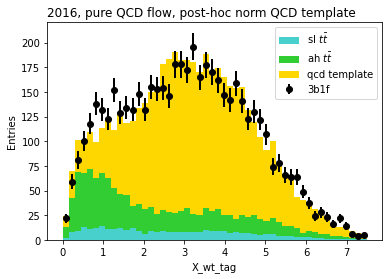

In [48]:

bot=0
for dfi,ci,li in zip([sl.df,ah.df],['mediumturquoise','limegreen'],[r'sl $t\bar{t}$',r'ah $t\bar{t}$',]):

    mi = dfi.X_hh < 1.6
    ntt = np.histogram(dfi.loc[mi,'X_wt_tag'],xbins, weights=dfi.loc[mi,'mc_sf'])[0]
    plt.hist(xx,xbins,weights=ntt,color=ci,label=li,bottom=bot)

    bot+=ntt
    
pi = qcdPred/qcdObs
plt.hist(xx,xbins,weights=pi*np.array(hdict['X_wt_tag_SR_mean']),
         color='gold',label='qcd template',bottom=bot)


    
n3b1f = np.histogram(d.df.loc[d.df.X_hh < 1.6,'X_wt_tag'],xbins)[0]
plt.errorbar(xx,n3b1f,np.sqrt(n3b1f),lw=0,elinewidth=2,marker='o',color='k',label='3b1f')

plt.legend()


plt.xlabel('X_wt_tag')
plt.ylabel('Entries')
plt.title('2016, pure QCD flow, post-hoc norm QCD template',loc='left')

**Conclusion:**
- I should sort out _why_ the validation loss was so much higher
- I think there is a bug in my prediction of the normalization - so I should maybe investigate the GP fit to find out where it might be?

**But - I think this is quite cooool** :)

In [49]:
f = np.load('../gp-for-flows/test.npz')

In [50]:
for i in f.files:
    print(i, f[i].shape)
    #print)

m1m2 (625, 2)
bkgd_2d (25, 25)
bkgd (625,)
stat_err (625,)
norm_bkgd (511,)
norm_stat_err (511,)
bkgdmodel (625,)
uncert (625,)


In [51]:
x_min = x * (1 + eps) - r_CR
x_max = x * (1 + eps) + r_CR
y_min = y * (1 + eps) - r_CR
y_max = y * (1 + eps) + r_CR

nbinsx,nbinsy = 25,25

bins = [
    np.linspace(x_min, x_max, nbinsx + 1),
    np.linspace(y_min, y_max, nbinsy + 1),
]


In [52]:
ntag, minQ

(3, 1)

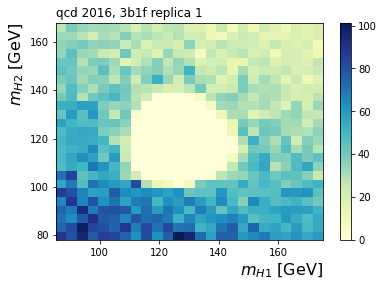

In [53]:
plt.hist2d(*f['m1m2'].T,bins,
           cmap='YlGnBu',weights=f['bkgd'])

plt.xlabel('$m_{H1}$ [GeV]',loc='right',fontsize=16)
plt.ylabel('$m_{H2}$ [GeV]',loc='top',fontsize=16)

plt.colorbar()

plt.title(f'qcd 20{yr}, {ntag}b{minQ}f replica {replica}',loc='left')

plt.show()

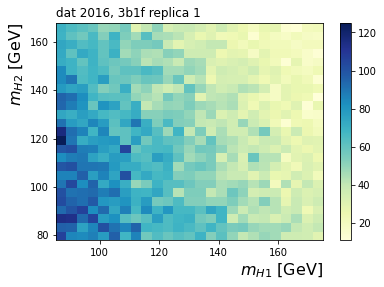

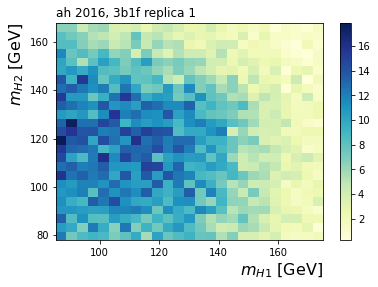

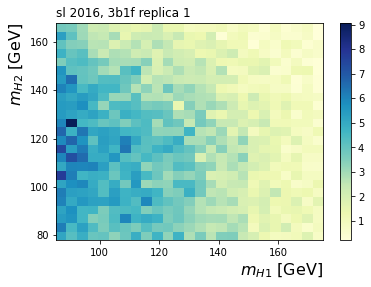

In [54]:
h_2d = {}
for df, mc,ps in zip([d.df,ah.df,sl.df],[False,True,True],['dat','ah','sl']):
    
    plt.figure()
    hi,ex,ey,_ = plt.hist2d(*df[['m_h1','m_h2']].values.T,
                            bins, cmap='YlGnBu',
                            weights=df['mc_sf'].values if mc else None)

    plt.xlabel('$m_{H1}$ [GeV]',loc='right',fontsize=16)
    plt.ylabel('$m_{H2}$ [GeV]',loc='top',fontsize=16)

    plt.colorbar()

    plt.title(f'{ps} 20{yr}, {ntag}b{minQ}f replica {replica}',loc='left')

    
    h_2d[ps] = hi
    
    plt.show()

In [55]:
m1 = 0.5*(ex[1:]+ex[:-1])
m2 = 0.5*(ey[1:]+ey[:-1])

In [56]:
m1

array([ 87. ,  90.6,  94.2,  97.8, 101.4, 105. , 108.6, 112.2, 115.8,
       119.4, 123. , 126.6, 130.2, 133.8, 137.4, 141. , 144.6, 148.2,
       151.8, 155.4, 159. , 162.6, 166.2, 169.8, 173.4])

In [57]:
m2

array([ 79.65,  83.25,  86.85,  90.45,  94.05,  97.65, 101.25, 104.85,
       108.45, 112.05, 115.65, 119.25, 122.85, 126.45, 130.05, 133.65,
       137.25, 140.85, 144.45, 148.05, 151.65, 155.25, 158.85, 162.45,
       166.05])

In [58]:
qcd = h_2d['dat'] - h_2d['ah'] - h_2d['sl']

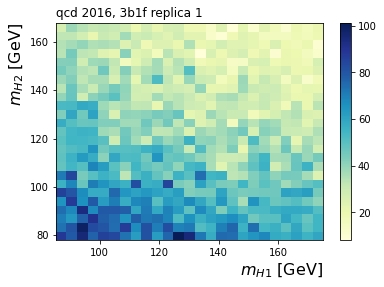

In [59]:
plt.hist2d(*f['m1m2'].T,bins,
           cmap='YlGnBu',weights=qcd.flatten())

plt.xlabel('$m_{H1}$ [GeV]',loc='right',fontsize=16)
plt.ylabel('$m_{H2}$ [GeV]',loc='top',fontsize=16)

plt.colorbar()

plt.title(f'qcd 20{yr}, {ntag}b{minQ}f replica {replica}',loc='left')

plt.show()

In [60]:
f['bkgd']-qcd.flatten()

array([-7.10542736e-14,  0.00000000e+00,  1.42108547e-14,  4.26325641e-14,
       -7.10542736e-14,  1.42108547e-14,  5.68434189e-14, -4.97379915e-14,
       -1.42108547e-14,  3.55271368e-14, -4.26325641e-14,  2.84217094e-14,
        2.84217094e-14, -2.84217094e-14, -3.55271368e-14,  5.68434189e-14,
       -8.52651283e-14,  7.10542736e-14,  0.00000000e+00,  4.26325641e-14,
       -1.42108547e-14, -2.84217094e-14,  7.10542736e-15, -7.10542736e-15,
        2.84217094e-14, -4.26325641e-14, -1.42108547e-14,  2.84217094e-14,
        2.84217094e-14,  7.10542736e-14,  4.26325641e-14, -1.42108547e-14,
       -1.42108547e-14, -4.26325641e-14,  4.26325641e-14, -2.84217094e-14,
        1.42108547e-14,  7.10542736e-14,  4.97379915e-14, -1.42108547e-14,
       -2.84217094e-14, -4.26325641e-14,  1.42108547e-14,  4.26325641e-14,
        0.00000000e+00,  3.55271368e-14,  4.97379915e-14, -7.10542736e-15,
       -1.42108547e-14, -7.10542736e-15, -1.42108547e-14,  2.84217094e-14,
        2.84217094e-14,  

Sanity check passed - we have the right 2d hist getting fed into the GP fit.

Double check the $t\bar{t}$ contamination.

In [61]:
np.sum(h_2d['ah']) / np.sum(h_2d['dat'])

0.13915945725570933

In [62]:
np.sum(h_2d['sl']) / np.sum(h_2d['dat'])

0.05473921349052869

Interesting... actually a little lower than I might have expected.

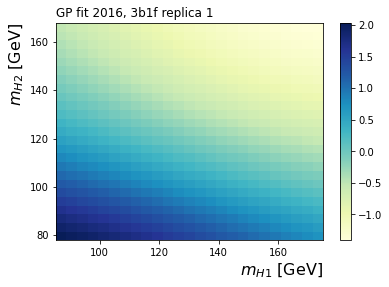

In [63]:
plt.hist2d(*f['m1m2'].T,bins,
       cmap='YlGnBu',weights=f['bkgdmodel'])

plt.xlabel('$m_{H1}$ [GeV]',loc='right',fontsize=16)
plt.ylabel('$m_{H2}$ [GeV]',loc='top',fontsize=16)

plt.colorbar()

plt.title(f'GP fit 20{yr}, {ntag}b{minQ}f replica {replica}',loc='left')


#h_2d[ps] = hi

plt.show()

**Goal:** Xform this back to QCD space to c.f. the iput

In [64]:
f['bkgd_2d'][f['bkgd_2d']!=0].shape

(551,)

In [65]:
mu =  np.mean(f['bkgd_2d'][f['bkgd_2d']!=0])
std = np.std(f['bkgd_2d'][f['bkgd_2d']!=0])

In [66]:
bkgdmodel = mu + f['bkgdmodel']*std

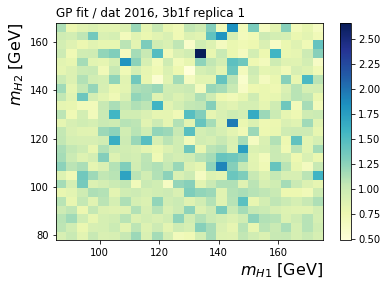

In [67]:
plt.hist2d(*f['m1m2'].T,bins,
       cmap='YlGnBu',weights=bkgdmodel/qcd.flatten())

plt.xlabel('$m_{H1}$ [GeV]',loc='right',fontsize=16)
plt.ylabel('$m_{H2}$ [GeV]',loc='top',fontsize=16)

plt.colorbar()

plt.title(f'GP fit / dat 20{yr}, {ntag}b{minQ}f replica {replica}',loc='left')


#h_2d[ps] = hi

plt.show()

In [68]:
sum(bkgdmodel) / sum(qcd.flatten())

0.956913771380555

**Q:** What is the error o j the blided regio?

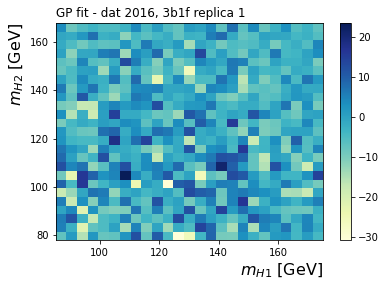

In [69]:
plt.hist2d(*f['m1m2'].T,bins,
       cmap='YlGnBu',weights=bkgdmodel - qcd.flatten())

plt.xlabel('$m_{H1}$ [GeV]',loc='right',fontsize=16)
plt.ylabel('$m_{H2}$ [GeV]',loc='top',fontsize=16)

plt.colorbar()

plt.title(f'GP fit - dat 20{yr}, {ntag}b{minQ}f replica {replica}',loc='left')


#h_2d[ps] = hi

plt.show()

Interestig, my model is always predicting an underprediction of the true QCD model.

In [70]:
dfi = pd.read_hdf('../gp-for-flows/models/qcd161718-MAY21_3b1f_1of10_detaCut_ggf/df_gp_100k_16.h5')

In [71]:
dfi.head()

m_h1        m_h2      X_hh      VR_hh      CR_hh  kinematic_region  \
0  140.418024  101.358637  1.936094  22.978567  23.796779                 1   
1  115.318156  120.318493  0.801791  12.403323  15.095623                 0   
2   98.562276  118.081780  2.582504  29.258659  31.995023                 1   
3  136.246573   97.928877  2.144874  24.137307  25.644170                 1   
4   91.698234  131.788460  3.697027  37.746142  39.525713                 2   

   yr  
0  16  
1  16  
2  16  
3  16  
4  16